In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


DIR_REAL_TRAIN = '/Users/alexchilton/Downloads/working2/train'
DIR_REAL_TEST = '/Users/alexchilton/Downloads/working2/test'
DIR_REAL_VALIDATION = '/Users/alexchilton/Downloads/working2/validation'

def load_images_from_folder(folder):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img_array = np.array(img).flatten()  # Flatten the image
                images.append(img_array)
                labels.append(class_name)
    return np.array(images), np.array(labels)

# Load datasets
X_train, y_train = load_images_from_folder(DIR_REAL_TRAIN)
X_test, y_test = load_images_from_folder(DIR_REAL_TEST)
X_val, y_val = load_images_from_folder(DIR_REAL_VALIDATION)


In [5]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Validate the classifier
y_val_pred = clf.predict(X_val)
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred)}')


Validation Accuracy: 0.9572649572649573


In [6]:
# Test the classifier
y_test_pred = clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')


Test Accuracy: 0.958217270194986


Index: 2, Predicted: bell pepper, Actual: apple
Index: 6, Predicted: cauliflower, Actual: apple
Index: 7, Predicted: potato, Actual: apple
Index: 23, Predicted: peas, Actual: chilli pepper
Index: 64, Predicted: peas, Actual: sweetpotato
Index: 65, Predicted: soy beans, Actual: sweetpotato
Index: 94, Predicted: bell pepper, Actual: capsicum
Index: 157, Predicted: pear, Actual: potato
Index: 159, Predicted: pear, Actual: potato
Index: 177, Predicted: corn, Actual: sweetcorn
Index: 265, Predicted: sweetcorn, Actual: corn
Index: 268, Predicted: sweetcorn, Actual: corn
Index: 286, Predicted: apple, Actual: banana
Index: 287, Predicted: eggplant, Actual: banana
Index: 347, Predicted: pineapple, Actual: carrot


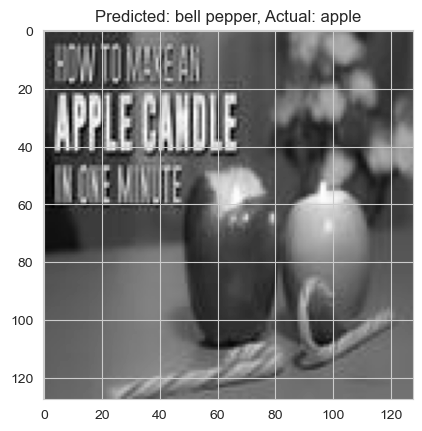

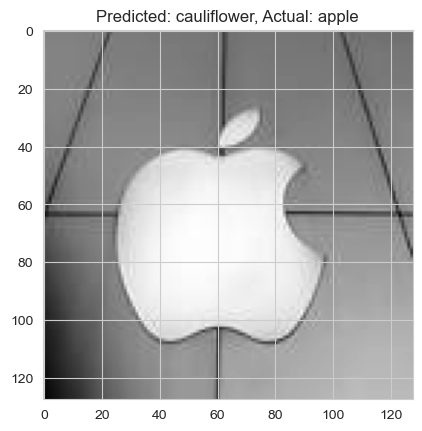

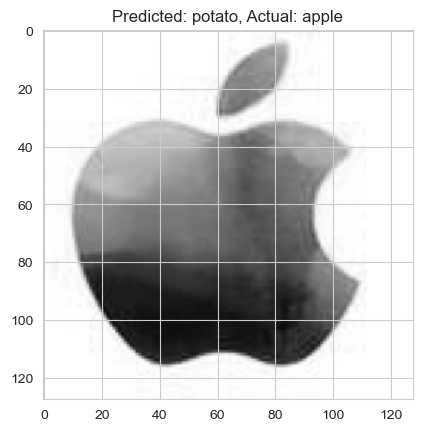

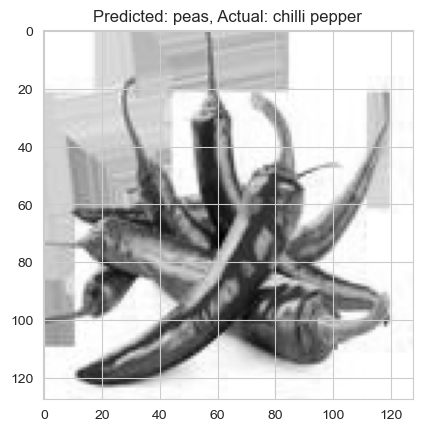

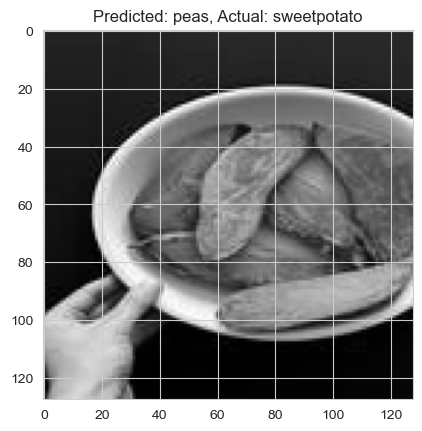

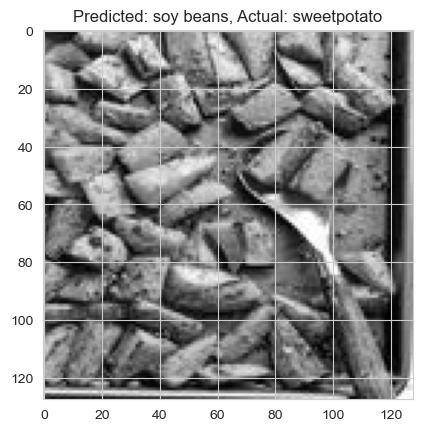

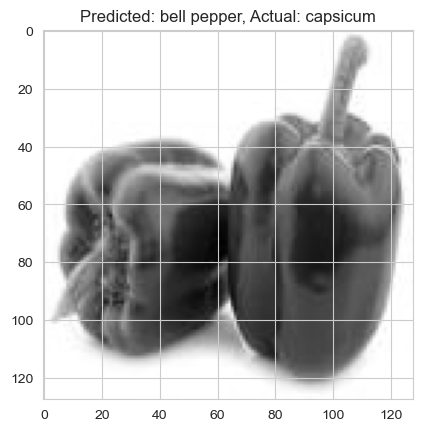

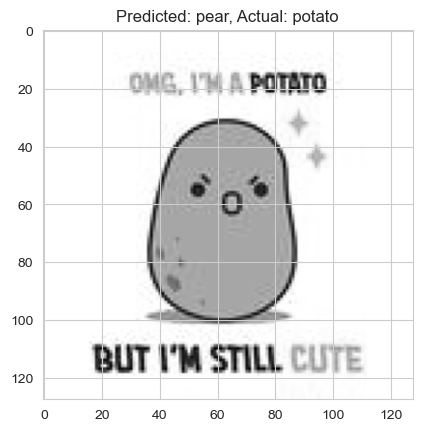

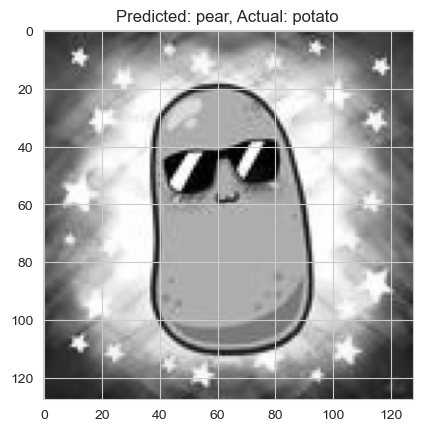

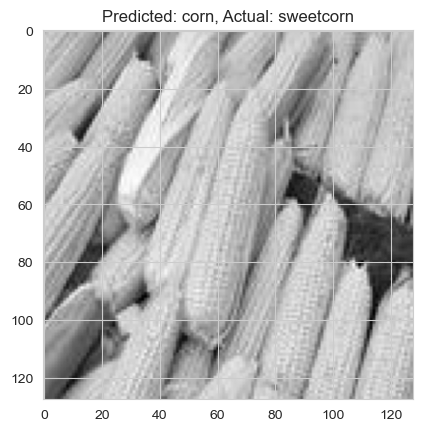

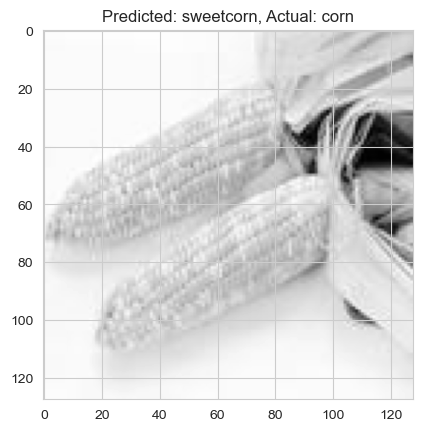

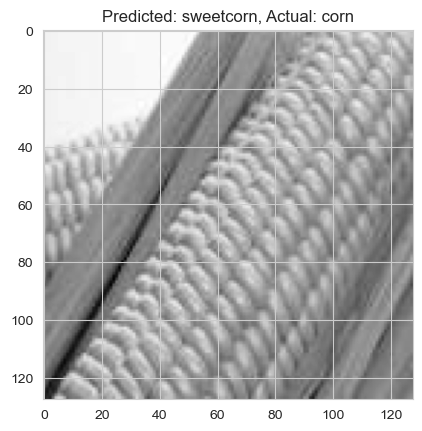

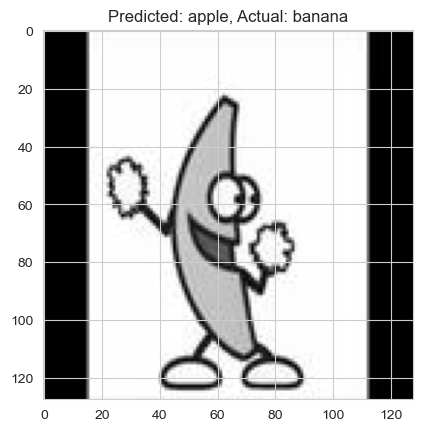

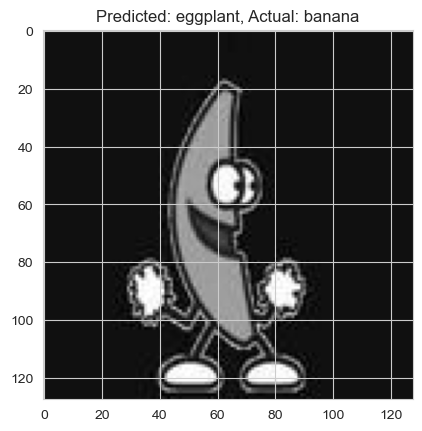

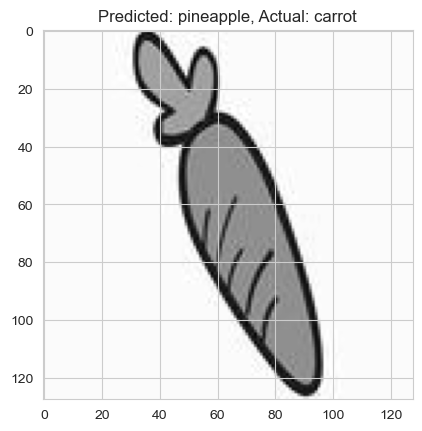

In [8]:
# Identify misclassified samples
misclassified_indices = np.where(y_val != y_val_pred)[0]

# Display misclassified samples
for index in misclassified_indices:
    print(f"Index: {index}, Predicted: {y_val_pred[index]}, Actual: {y_val[index]}")

# Visualize misclassified images
for index in misclassified_indices:
    img = X_val[index].reshape(128, 128)  # Assuming the images were resized to 64x64
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {y_val_pred[index]}, Actual: {y_val[index]}")
    plt.show()